Data taken from https://transparencia.unicamp.br/paginas/consultar-salarios-do-mes-atual/

In [198]:
from numpy.core.fromnumeric import mean
import pandas as pd #dataframe
import numpy as np#dataframe
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

In [199]:
data_original = pd.read_csv('consultar-salarios.csv',sep=';')
print(data_original.shape)
data = data_original.drop_duplicates()[0:1000]
print(data.shape)
data.head(5)

(14137, 12)
(1000, 12)


,Matrícula,Nome,Cargo,Referência,Salário Bruto Nominal,Indenizações,Redutor,Descontos,Líquido,Férias e 13o Salário,Lotação,Salário Bruto Efetivo
0,1651,DERCIO TABOSSI,PR ASS ADMINISTRATIVOS / Técnico em administração,M2A,"R$ 10.186,69","R$ 0,00","R$ 0,00","R$ 2.303,08","R$ 7.883,61","R$ 0,00",01.14.16.04 REITORIA/PREFEITURA GABINETE/COORD...,"R$ 10.186,69"
1,1678,RAUL DOS SANTOS,PR APOIO TEC SERVICOS / Técnico gráfico,M1A,"R$ 7.360,50","R$ 0,00","R$ 0,00","R$ 3.615,89","R$ 3.744,61","R$ 0,00","10.10 INSTITUTO DE MATEMATICA, ESTATISTICA E C...","R$ 7.360,50"
2,1686,EDUARDO BRAGA,Técnico Administrativo,24,"R$ 4.250,66","R$ 0,00","R$ 0,00","R$ 2.835,92","R$ 1.414,74","R$ 0,00",01.12.12 REITORIA/DIRETORIA GERAL DE ADMINISTR...,"R$ 4.250,66"
3,10022,BERENICE FERREIRA,Atendente de Enfermagem,16,"R$ 2.659,49","R$ 0,00","R$ 0,00","R$ 255,40","R$ 2.404,09","R$ 0,00",27.09.15.02 HOSPITAL DA MULHER PROF.DR.JOSE AR...,"R$ 2.659,49"
4,13960,LIDIA TEREZINHA FERREIRA,PAEPE APOSENTADO / Prof Assuntos Admin,S1A,"R$ 11.739,72","R$ 0,00","R$ 0,00","R$ 2.962,46","R$ 8.777,26","R$ 0,00",26 INSTITUTO DE ECONOMIA,"R$ 11.739,72"


In [200]:
data['Salário Bruto Nominal'] = data['Salário Bruto Nominal'].str.replace('.','')
data['Salário Bruto Nominal'] = data['Salário Bruto Nominal'].str.replace(',','.')
data['Salário Bruto Nominal'] = data['Salário Bruto Nominal'].str[3:]

data['Indenizações'] = data['Indenizações'].str.replace('.','')
data['Indenizações'] = data['Indenizações'].str.replace(',','.')
data['Indenizações'] = data['Indenizações'].str[3:]

data['Redutor'] = data['Redutor'].str.replace('.','')
data['Redutor'] = data['Redutor'].str.replace(',','.')
data['Redutor'] = data['Redutor'].str[3:]

data['Descontos'] = data['Descontos'].str.replace('.','')
data['Descontos'] = data['Descontos'].str.replace(',','.')
data['Descontos'] = data['Descontos'].str[3:]

data['Líquido'] = data['Líquido'].str.replace('.','')
data['Líquido'] = data['Líquido'].str.replace(',','.')
data['Líquido'] = data['Líquido'].str[3:]

data['Férias e 13o Salário'] = data['Férias e 13o Salário'].str.replace('.','')
data['Férias e 13o Salário'] = data['Férias e 13o Salário'].str.replace(',','.')
data['Férias e 13o Salário'] = data['Férias e 13o Salário'].str[3:]

data['Salário Bruto Efetivo'] = data['Salário Bruto Efetivo'].str.replace('.','')
data['Salário Bruto Efetivo'] = data['Salário Bruto Efetivo'].str.replace(',','.')
data['Salário Bruto Efetivo'] = data['Salário Bruto Efetivo'].str[3:]

In [201]:
data["Salário Bruto Nominal"] = pd.to_numeric(data["Salário Bruto Nominal"])
data["Indenizações"] = pd.to_numeric(data["Indenizações"])
data["Redutor"] = pd.to_numeric(data["Redutor"])
data["Descontos"] = pd.to_numeric(data["Descontos"])
data["Líquido"] = pd.to_numeric(data["Líquido"])
data["Férias e 13o Salário"] = pd.to_numeric(data["Férias e 13o Salário"])
data["Salário Bruto Efetivo"] = pd.to_numeric(data["Salário Bruto Efetivo"])
#data.dtypes

<AxesSubplot:xlabel='Salário Bruto Nominal', ylabel='Count'>

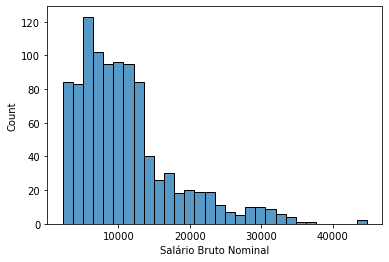

In [202]:
sns.histplot(data['Salário Bruto Nominal'])

<AxesSubplot:xlabel='Salário Bruto Efetivo', ylabel='Count'>

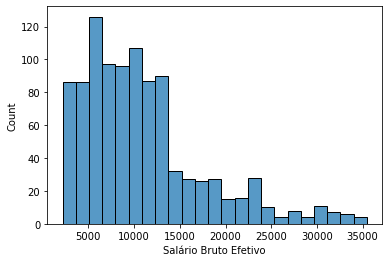

In [203]:
sns.histplot(data['Salário Bruto Efetivo'])

In [209]:
#data['Cargo1']=data['Cargo'].str.split(pat='/',n=1)
#data['Cargo1']=data['Cargo1'].str[0]

data['Cargo1']=data['Cargo'].str.split(pat='/',n=1)

In [210]:


if (data['Cargo'].str[1] is None): 
    data['Cargo1']=Nan
    data['Cargo2']=data['Cargo'].str[0]
else:
    data['Cargo1']=data['Cargo'].str[0]
    data['Cargo2']=data['Cargo'].str[1]

print(data['Cargo1'],data['Cargo2'])

0      P
1      P
2      T
3      A
4      P
      ..
995    P
996    P
997    B
998    P
999    A
Name: Cargo1, Length: 1000, dtype: object 0      R
1      R
2      é
3      t
4      A
      ..
995    A
996    R
997    i
998    S
999    t
Name: Cargo2, Length: 1000, dtype: object


In [154]:
data
#print(data['Cargo'].str[0].unique)

,Matrícula,Nome,Cargo,Referência,Salário Bruto Nominal,Indenizações,Redutor,Descontos,Líquido,Férias e 13o Salário,Lotação,Salário Bruto Efetivo,Cargo1,Cargo2
0,1651,DERCIO TABOSSI,PR ASS ADMINISTRATIVOS / Técnico em administração,M2A,10186.69,0.0,0.0,2303.08,7883.61,0.0,01.14.16.04 REITORIA/PREFEITURA GABINETE/COORD...,10186.69,P,Técnico em administração
1,1678,RAUL DOS SANTOS,PR APOIO TEC SERVICOS / Técnico gráfico,M1A,7360.50,0.0,0.0,3615.89,3744.61,0.0,"10.10 INSTITUTO DE MATEMATICA, ESTATISTICA E C...",7360.50,P,Técnico gráfico
2,1686,EDUARDO BRAGA,Técnico Administrativo,24,4250.66,0.0,0.0,2835.92,1414.74,0.0,01.12.12 REITORIA/DIRETORIA GERAL DE ADMINISTR...,4250.66,T,NaN
3,10022,BERENICE FERREIRA,Atendente de Enfermagem,16,2659.49,0.0,0.0,255.40,2404.09,0.0,27.09.15.02 HOSPITAL DA MULHER PROF.DR.JOSE AR...,2659.49,A,NaN
4,13960,LIDIA TEREZINHA FERREIRA,PAEPE APOSENTADO / Prof Assuntos Admin,S1A,11739.72,0.0,0.0,2962.46,8777.26,0.0,26 INSTITUTO DE ECONOMIA,11739.72,P,Prof Assuntos Admin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,26344,STELLA MARIS COLICCHIO M CAVALCANTE,PAEPE APOSENTADO / Profissional área humanas,S1A,11978.69,0.0,0.0,3003.76,8974.93,0.0,"08.01 INSTITUTO DE FISICA ""GLEB WATAGHIN""/DEPA...",11978.69,P,Profissional área humanas
996,26352,SUZELEIM RODRIGUES,PR ARTE CULT COMUNICACAO / Profissional de áre...,S1A,11778.89,0.0,0.0,3501.36,8277.53,0.0,17.05 INSTITUTO DE ARTES/DEPARTAMENTO DE MULTI...,11778.89,P,Profissional de área técnica
997,31852,SHIRLEY ALICE GONCALVES,Biologista,40,12376.07,0.0,0.0,3476.78,8899.29,0.0,15.10.11.07 HOSPITAL DE CLINICAS/COORDENADORIA...,12376.07,B,NaN
998,31879,MARIA HELENA SANTOS ALMEIDA,PSICOLOGO / Psicólogo organizacional,S1A,9542.46,0.0,0.0,2871.84,6670.62,0.0,11 INSTITUTO DE QUIMICA,9542.46,P,Psicólogo organizacional


In [128]:
print(data['Cargo'].str[1].unique)

<bound method Series.unique of 0           Técnico em administração
1                    Técnico gráfico
2                                NaN
3                                NaN
4                Prof Assuntos Admin
                   ...              
995        Profissional área humanas
996     Profissional de área técnica
997                              NaN
998         Psicólogo organizacional
999                              NaN
Name: Cargo, Length: 1000, dtype: object>
